# imports

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Analyse dataset

## load datasets

In [9]:
df_budget = pd.read_csv("budget.csv")
df_contract = pd.read_csv("contract.csv")

In [10]:
df_budget.head()

,district,specialty,points,status
0,м. Київ,16,127.5,0
1,м. Київ,16,160.9,0
2,м. Київ,16,151.4,0
3,м. Київ,16,150.6,0
4,м. Київ,16,147.7,0


In [11]:
df_contract.head()

,district,specialty,points,status
0,м. Київ,16,127.5,1
1,м. Київ,16,160.9,1
2,м. Київ,16,151.4,1
3,м. Київ,16,150.6,1
4,м. Київ,16,147.7,1


## PCA analysis
 - y_b - results related to budget set
 - y_c - results related to contract set
 X because data are the same for both groups

In [12]:
def separate_results_from_data(df):
    data = df.values
    X, y = data[:, :-1], data[:, -1:]
    y = y.astype("int")
    return X, y

X, y_b = separate_results_from_data(df_budget)
_, y_c = separate_results_from_data(df_contract)

In [13]:
def do_one_hot_encoding(X, columns=[0, 1]):
    ct = ColumnTransformer(
        transformers=[
            ("ohe", OneHotEncoder(categories="auto", sparse=False), columns)
        ],
        remainder="passthrough",
        n_jobs=-1
    )
    return ct.fit_transform(X)

X = do_one_hot_encoding(X)

In [14]:
X = StandardScaler().fit_transform(X)

In [15]:
X

array([[-0.15201797, -0.1307049 , -0.16327677, ..., -0.12915164,
        -0.09147707, -0.84622675],
       [-0.15201797, -0.1307049 , -0.16327677, ..., -0.12915164,
        -0.09147707,  0.10146702],
       [-0.15201797, -0.1307049 , -0.16327677, ..., -0.12915164,
        -0.09147707, -0.1680866 ],
       ...,
       [-0.15201797, -0.1307049 , -0.16327677, ..., -0.12915164,
        -0.09147707, -4.46392003],
       [-0.15201797, -0.1307049 , -0.16327677, ..., -0.12915164,
        -0.09147707, -4.46392003],
       [-0.15201797, -0.1307049 , -0.16327677, ..., -0.12915164,
        -0.09147707, -4.46392003]])

In [21]:
pca = PCA(random_state=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=2,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
X.shape[1]

139

Number of components that explain 80 percent of variance: 106, explained variance: 0.8025991132849449


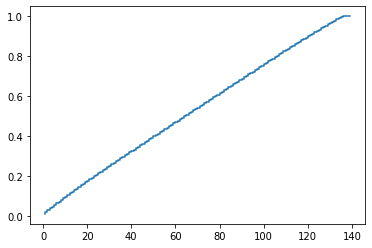

In [49]:
pca.explained_variance_ratio_
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1, 140), cumsum[0:139], label="cummulative explained variance")
idx = np.abs(cumsum - 0.8).argmin()
cumsum[idx]
print(f"Number of components that explain 80 percent of variance: {idx}, explained variance: {cumsum[idx]}")

## Results
 - Number of components to select with PCA about 106